In [1]:
import pandas as pd
import numpy as np

from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

from matplotlib import pyplot
import seaborn as sns

In [2]:
# Basic Ordinal Encoded Dataset for Non-Linear Models
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')

In [3]:
X = ordinal.drop(['SalePrice'], axis=1).values
y = ordinal.SalePrice.values

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
# list of other models to evaluate

def get_models():
    models = dict()
    models['rf no bs'] = RandomForestRegressor(bootstrap=False) 
    models['rf w bs'] = RandomForestRegressor(bootstrap=True) 
    return models

In [5]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'
          }

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [7]:
models = get_models()

In [8]:
#Create List of Dictionaries to evalute models

dfs = list()

for name, model in models.items():
    
    # evaluate the model
    df = evaluate_model(model, X, y)
    dfs.append(df)

In [9]:
dfs

[    fit_time  score_time   test_r2  test_neg_mae
 0   5.779852    0.024422  0.795174 -22744.913275
 1   6.260922    0.020114  0.742510 -21446.644225
 2   5.696950    0.020332  0.782825 -23006.982364
 3   5.814651    0.020156  0.761483 -22554.258973
 4   5.637109    0.012248  0.831361 -21734.644729
 5   5.707751    0.017902  0.736650 -23315.581647
 6   5.838272    0.027173  0.804367 -20265.511802
 7   5.759639    0.012284  0.760755 -22211.224593
 8   5.228183    0.013239  0.768950 -23215.888837
 9   5.411750    0.011476  0.762302 -23394.697829
 10  5.294265    0.010578  0.830484 -21697.102074
 11  5.185870    0.010871  0.793303 -23209.533469
 12  5.345391    0.010768  0.709769 -23133.662674
 13  5.064363    0.013643  0.817132 -21873.440019
 14  5.304742    0.010519  0.809509 -21480.466085,
     fit_time  score_time   test_r2  test_neg_mae
 0   3.673865    0.017495  0.894091 -15894.726957
 1   3.337347    0.010413  0.858884 -15266.393178
 2   3.504046    0.010523  0.897049 -15333.649167

In [10]:
rf_no_bs_df = dfs[0][['test_r2', 'test_neg_mae']]
rf_no_bs_df = rf_no_bs_df.assign(MAE = rf_no_bs_df['test_neg_mae'].abs())
rf_no_bs_df = rf_no_bs_df.rename(columns = {'test_r2':'RF NO BS R2', 'MAE':'RF NO BS MAE'})
rf_no_bs_df

,RF NO BS R2,test_neg_mae,RF NO BS MAE
0,0.795174,-22744.913275,22744.913275
1,0.742510,-21446.644225,21446.644225
2,0.782825,-23006.982364,23006.982364
3,0.761483,-22554.258973,22554.258973
4,0.831361,-21734.644729,21734.644729
5,0.736650,-23315.581647,23315.581647
6,0.804367,-20265.511802,20265.511802
7,0.760755,-22211.224593,22211.224593
8,0.768950,-23215.888837,23215.888837
9,0.762302,-23394.697829,23394.697829


In [11]:
rf_w_bs_df = dfs[1][['test_r2', 'test_neg_mae']]
rf_w_bs_df = rf_w_bs_df.assign(MAE = rf_w_bs_df['test_neg_mae'].abs())
rf_w_bs_df = rf_w_bs_df.rename(columns = {'test_r2':'RF W BS R2', 'MAE':'RF W BS MAE'})
rf_w_bs_df

,RF W BS R2,test_neg_mae,RF W BS MAE
0,0.894091,-15894.726957,15894.726957
1,0.858884,-15266.393178,15266.393178
2,0.897049,-15333.649167,15333.649167
3,0.875726,-14772.293624,14772.293624
4,0.913067,-14618.285543,14618.285543
5,0.894366,-16091.772655,16091.772655
6,0.903261,-13690.698585,13690.698585
7,0.893447,-14433.494031,14433.494031
8,0.913613,-14246.787112,14246.787112
9,0.850348,-16372.692442,16372.692442


In [12]:
box = pd.concat([rf_no_bs_df, rf_w_bs_df], axis=1)
box

,RF NO BS R2,test_neg_mae,RF NO BS MAE,RF W BS R2,test_neg_mae,RF W BS MAE
0,0.795174,-22744.913275,22744.913275,0.894091,-15894.726957,15894.726957
1,0.742510,-21446.644225,21446.644225,0.858884,-15266.393178,15266.393178
2,0.782825,-23006.982364,23006.982364,0.897049,-15333.649167,15333.649167
3,0.761483,-22554.258973,22554.258973,0.875726,-14772.293624,14772.293624
4,0.831361,-21734.644729,21734.644729,0.913067,-14618.285543,14618.285543
5,0.736650,-23315.581647,23315.581647,0.894366,-16091.772655,16091.772655
6,0.804367,-20265.511802,20265.511802,0.903261,-13690.698585,13690.698585
7,0.760755,-22211.224593,22211.224593,0.893447,-14433.494031,14433.494031
8,0.768950,-23215.888837,23215.888837,0.913613,-14246.787112,14246.787112
9,0.762302,-23394.697829,23394.697829,0.850348,-16372.692442,16372.692442


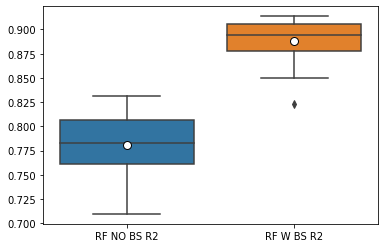

In [13]:
sns.boxplot(data=box[['RF NO BS R2', 'RF W BS R2']], showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"8"});

In [14]:
box.describe()

,RF NO BS R2,test_neg_mae,RF NO BS MAE,RF W BS R2,test_neg_mae,RF W BS MAE
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.780438,-22352.303506,22352.303506,0.887779,-15095.152182,15095.152182
std,0.035665,915.118734,915.118734,0.026101,806.668852,806.668852
min,0.709769,-23394.697829,20265.511802,0.822807,-16372.692442,13690.698585
25%,0.761119,-23171.598072,21715.873401,0.877455,-15779.746841,14560.015601
50%,0.782825,-22554.258973,22554.258973,0.894366,-14772.293624,14772.293624
75%,0.806938,-21715.873401,23171.598072,0.905586,-14560.015601,15779.746841
max,0.831361,-20265.511802,23394.697829,0.913613,-13690.698585,16372.692442


In [15]:
box.to_csv('Forest.csv', index=False)